In [27]:
# general lib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# time ani
import time

In [28]:
# data and smol klining
df = pd.read_csv("ADRO.csv")

df1 = df.iloc[2990:3253]
print(df1.head())
print(df1.tail())

df_pakai = df1['close']
print(df_pakai)
df_pakai = df_pakai.values.tolist()
print(df_pakai)

# inisiasi global dan lokal

df_global = []
i = 0
while i < 100:
    df_global.append(df_pakai[i])
    i += 1
print(df_global)

df_lokal = []
i = 30
while i > 0:
    df_lokal.append(df_global[len(df_global)-i])
    i -= 1
    
print(df_lokal)

       timestamp  open   low  high  close     volume
2990  2020-01-01  1565  1555  1590   1555          0
2991  2020-01-02  1555  1490  1555   1495   76612000
2992  2020-01-03  1460  1425  1470   1465  117795600
2993  2020-01-06  1455  1450  1515   1465   61423200
2994  2020-01-07  1480  1460  1540   1540   74336500
       timestamp  open   low  high  close    volume
3248  2020-12-28  1515  1460  1520   1505  98726000
3249  2020-12-29  1530  1470  1540   1490  99547900
3250  2020-12-30  1490  1425  1490   1430  82195800
3251  2020-12-31  1490  1425  1490   1430         0
3252  2021-01-01  1490  1425  1490   1430         0
2990    1555
2991    1495
2992    1465
2993    1465
2994    1540
        ... 
3248    1505
3249    1490
3250    1430
3251    1430
3252    1430
Name: close, Length: 263, dtype: int64
[1555, 1495, 1465, 1465, 1540, 1505, 1495, 1550, 1565, 1560, 1475, 1470, 1480, 1435, 1415, 1365, 1380, 1380, 1295, 1325, 1305, 1295, 1225, 1225, 1270, 1315, 1305, 1305, 1280, 1315, 1330, 1

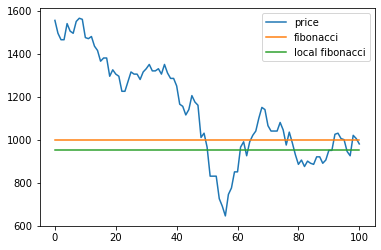

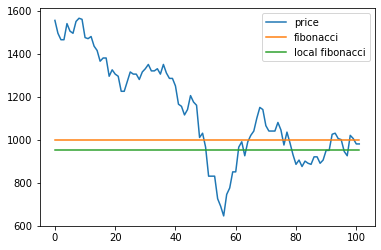

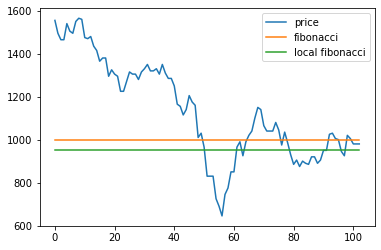

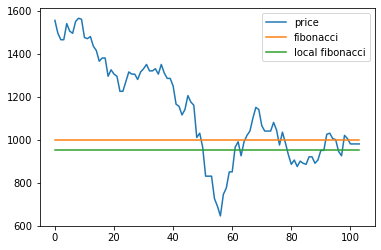

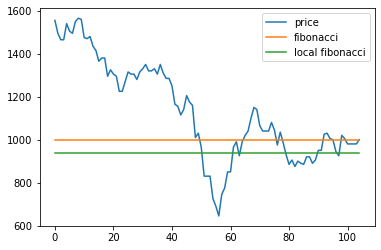

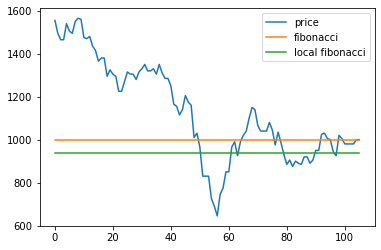

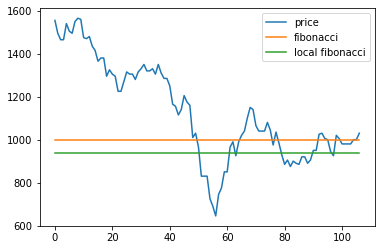

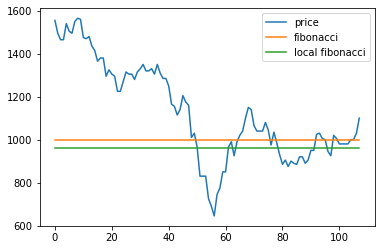

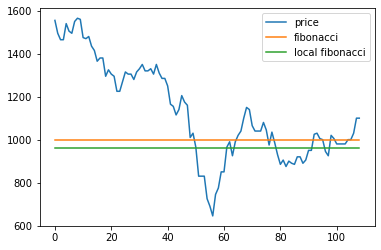

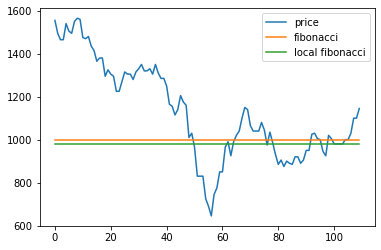

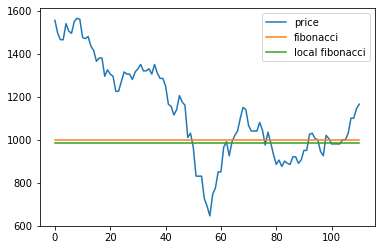

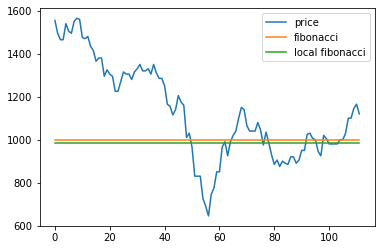

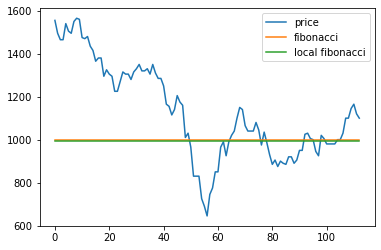

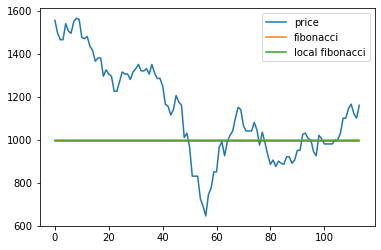

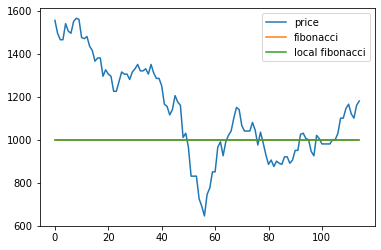

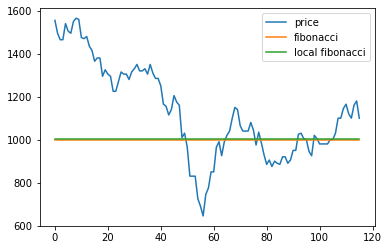

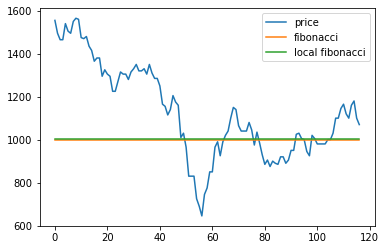

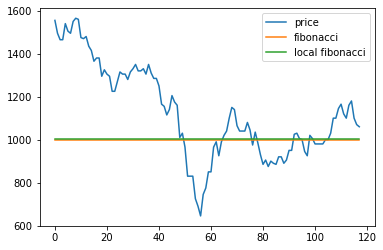

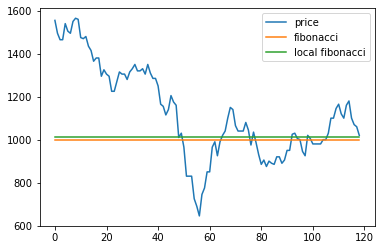

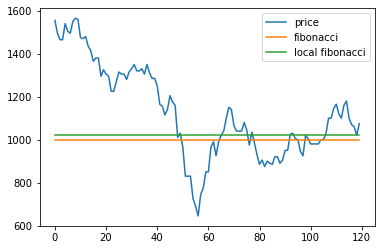

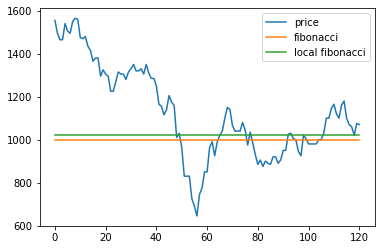

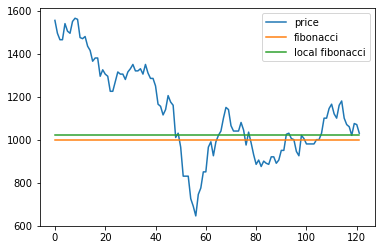

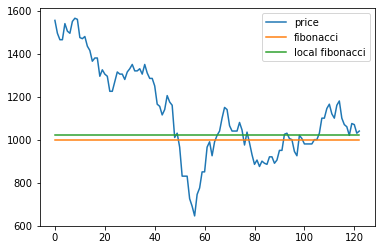

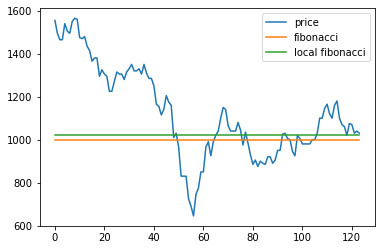

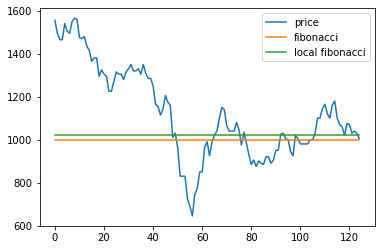

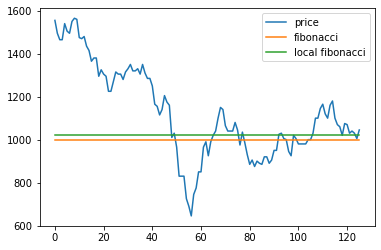

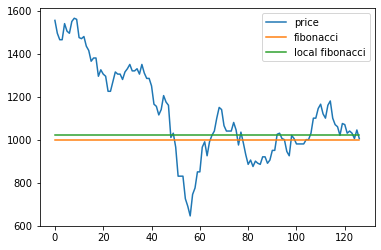

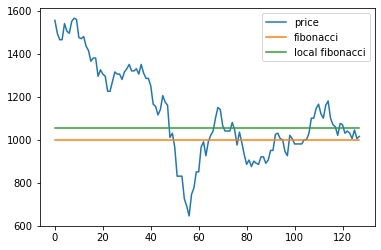

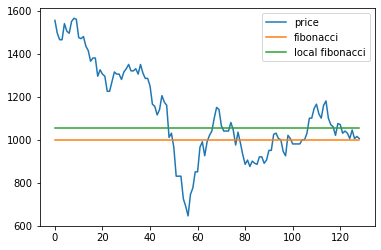

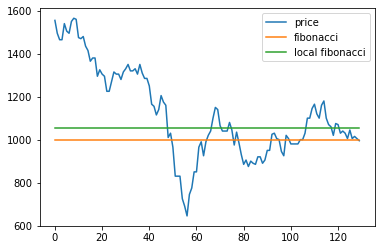

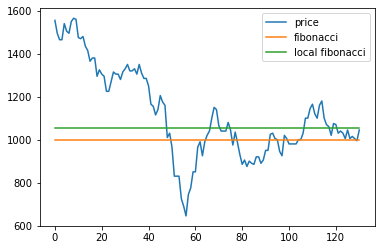

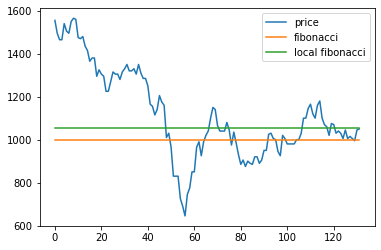

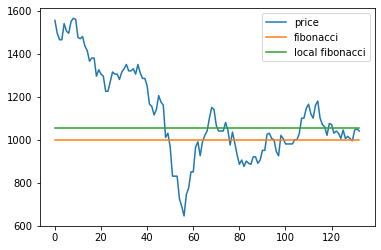

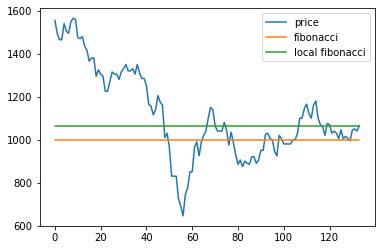

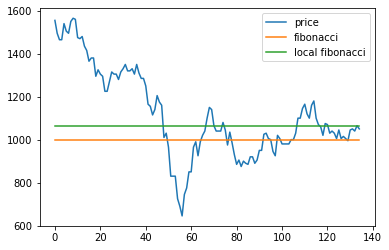

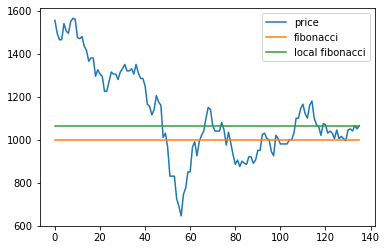

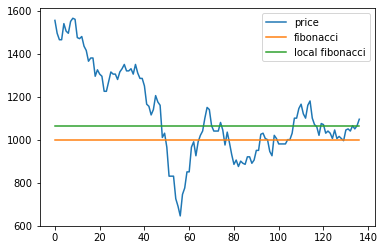

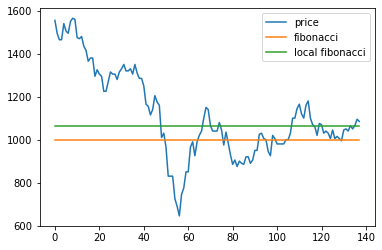

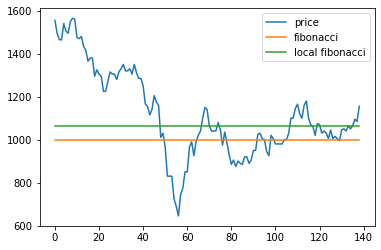

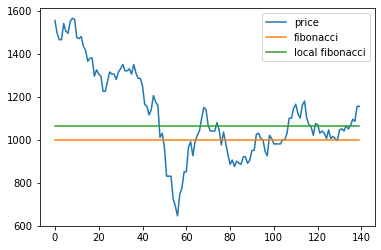

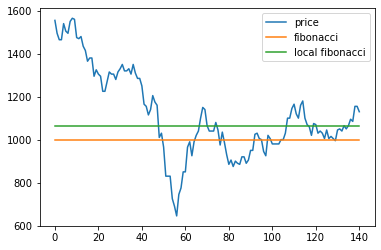

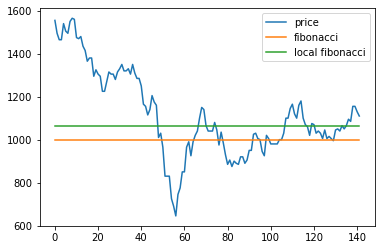

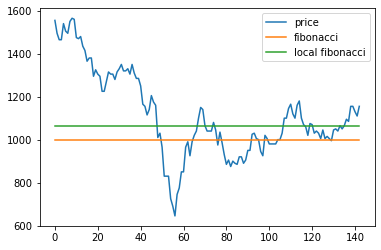

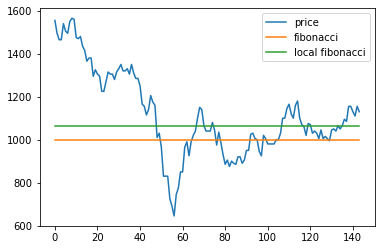

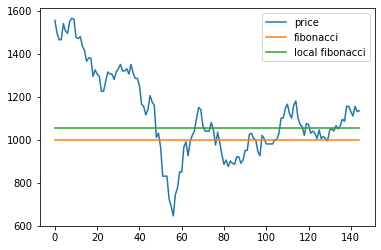

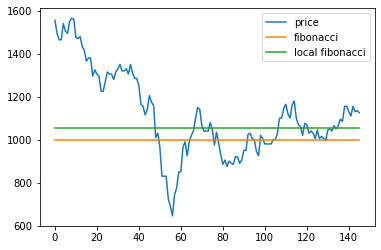

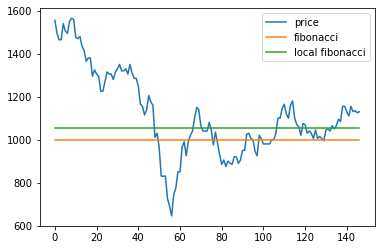

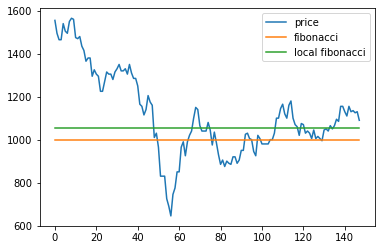

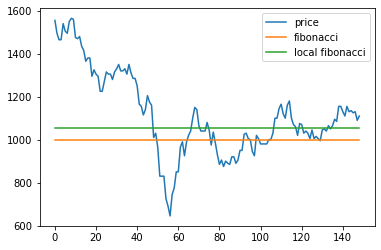

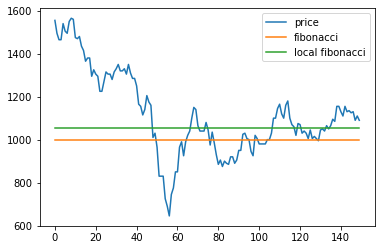

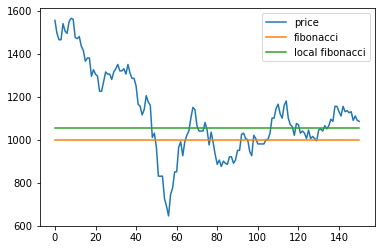

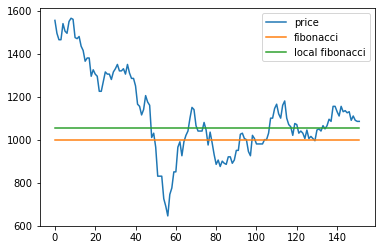

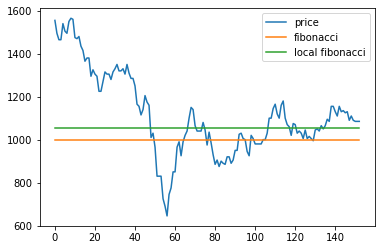

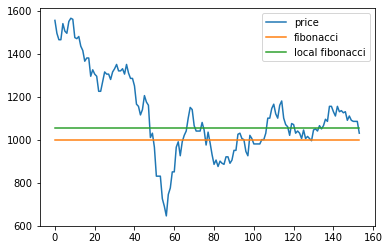

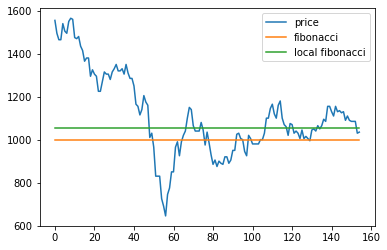

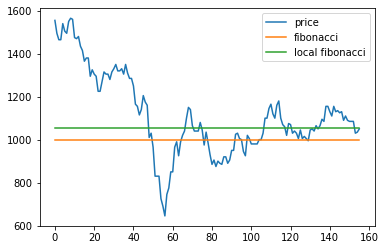

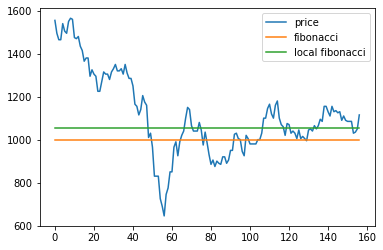

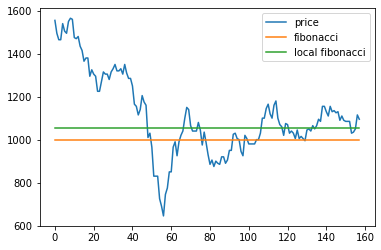

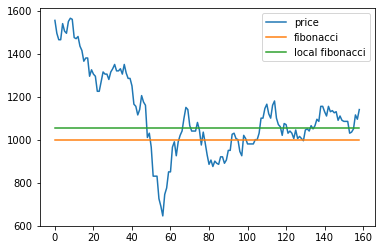

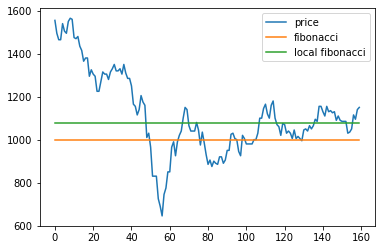

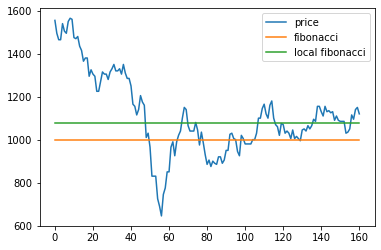

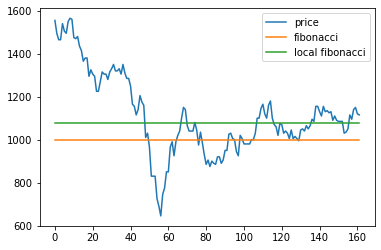

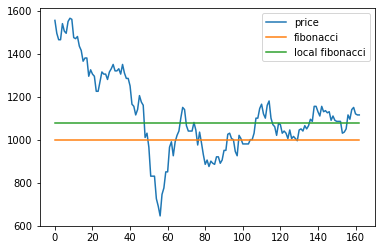

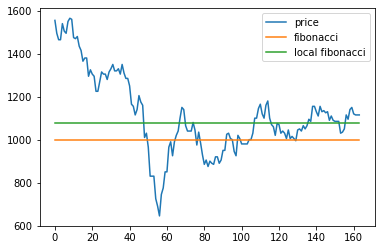

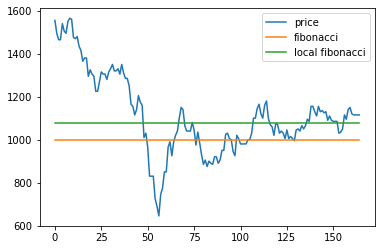

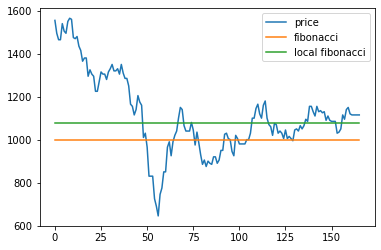

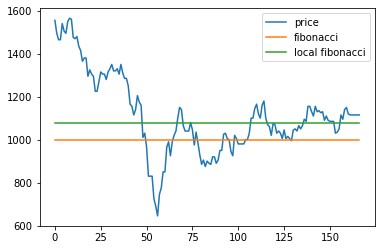

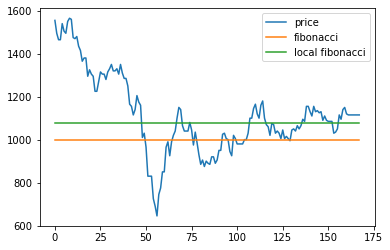

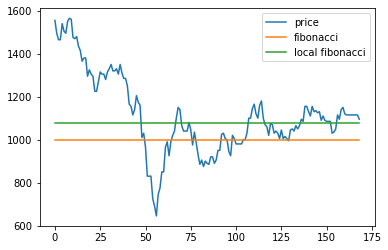

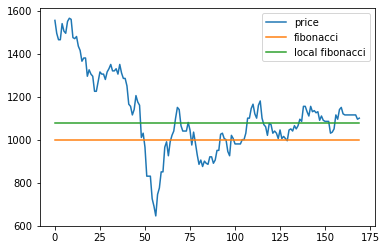

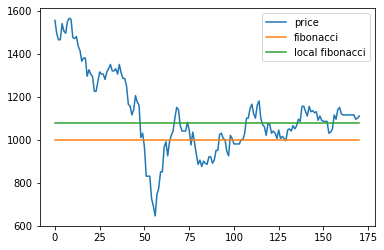

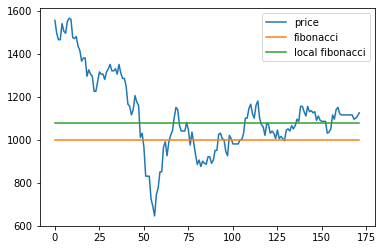

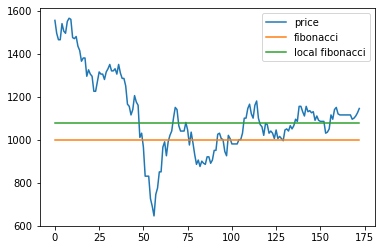

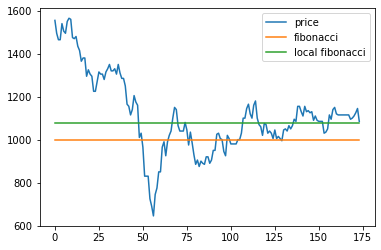

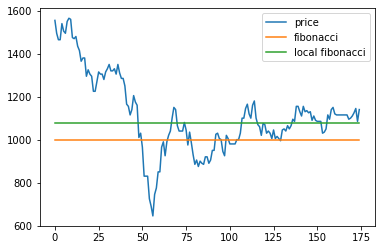

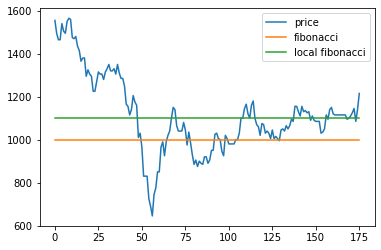

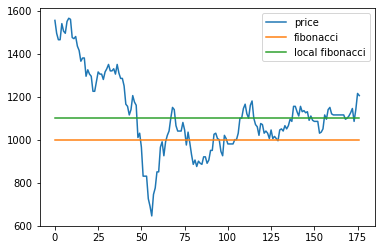

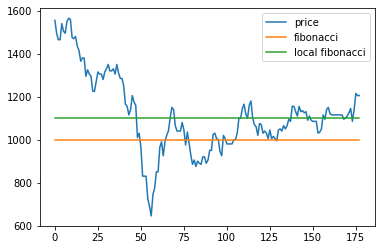

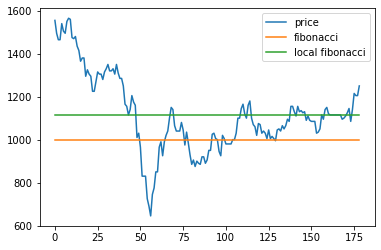

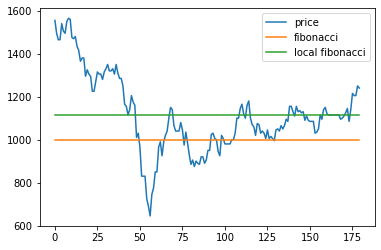

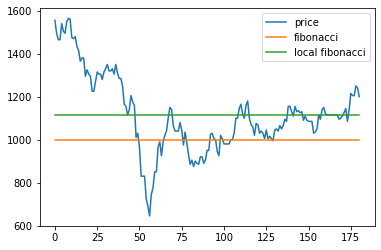

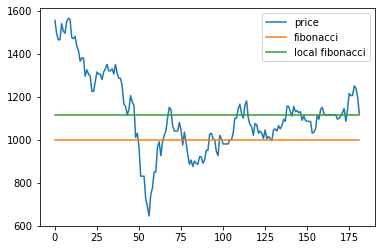

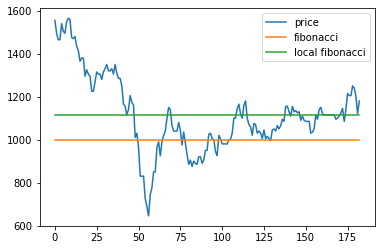

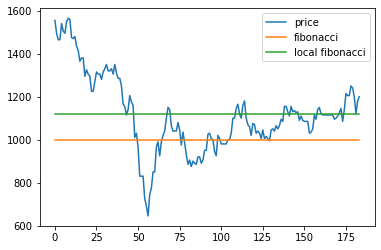

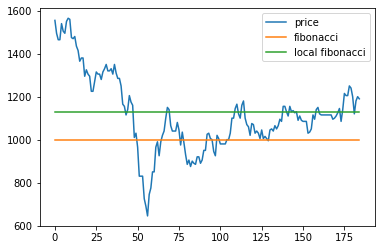

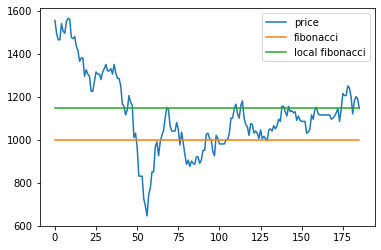

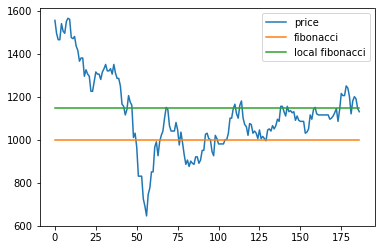

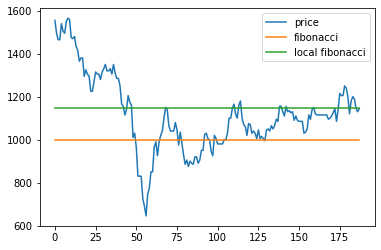

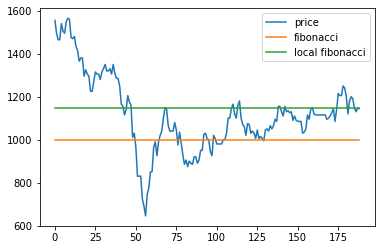

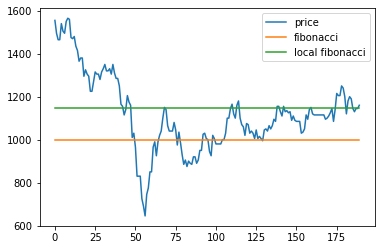

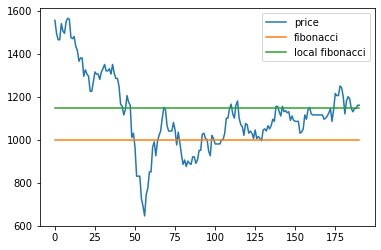

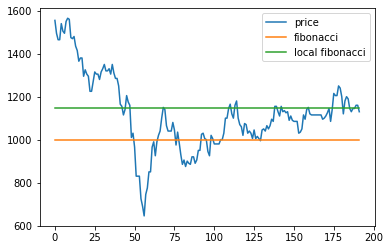

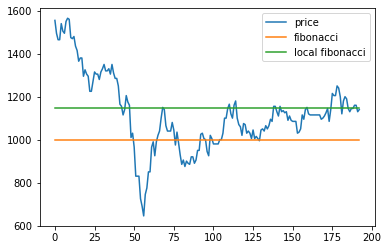

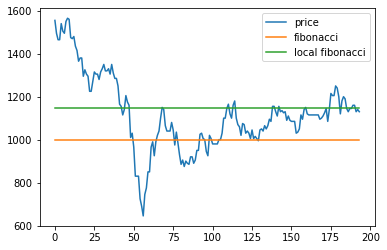

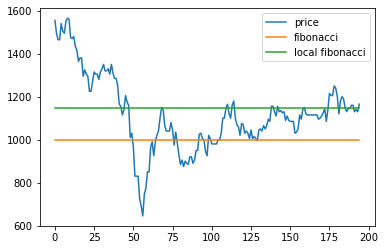

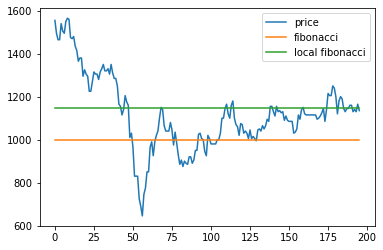

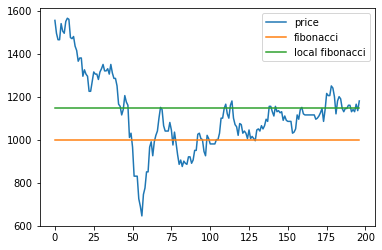

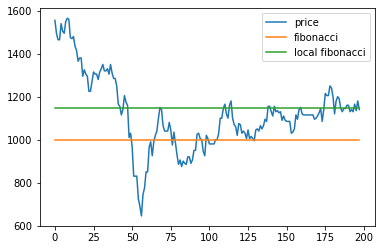

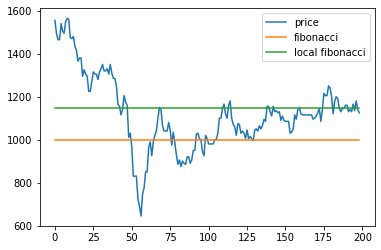

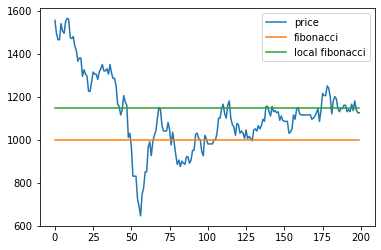

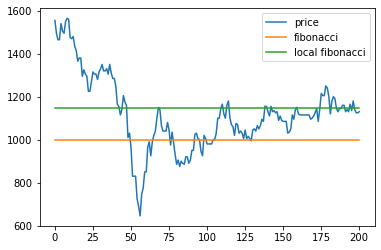

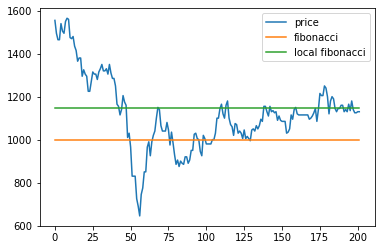

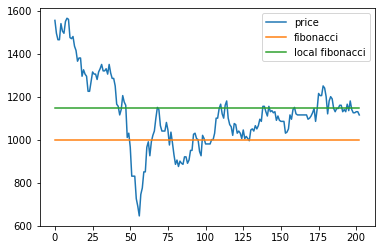

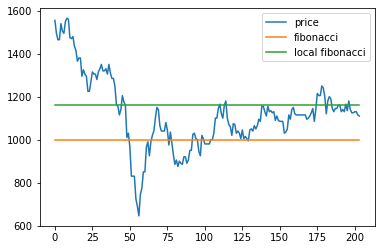

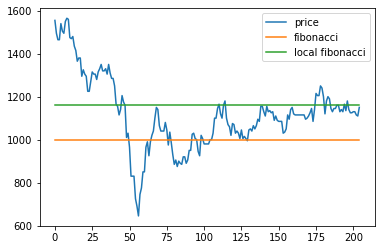

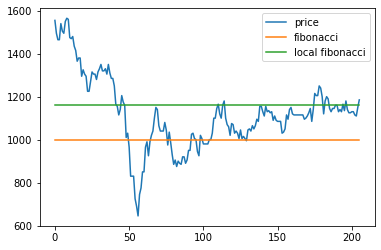

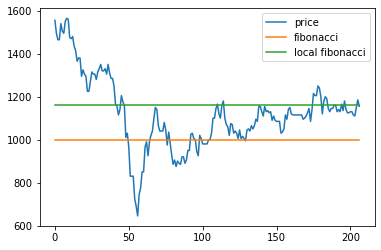

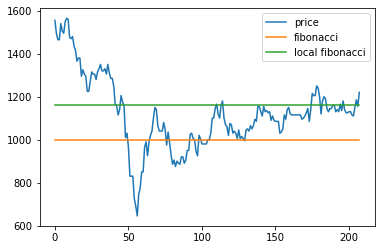

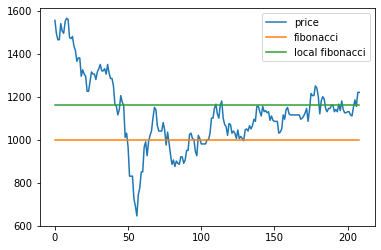

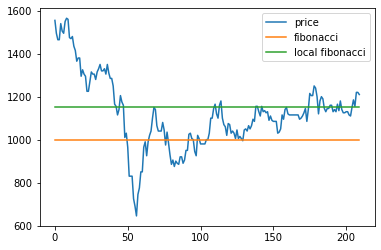

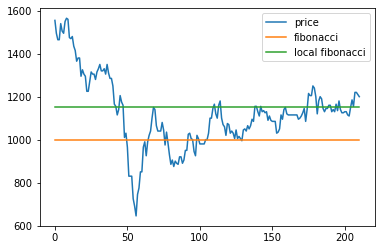

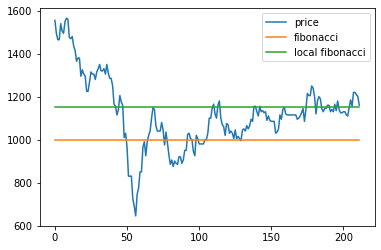

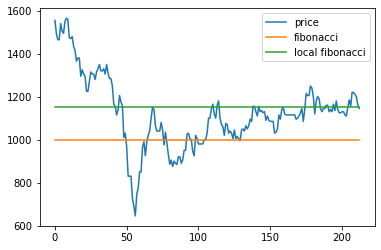

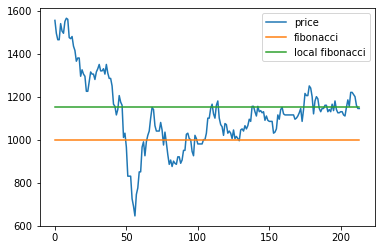

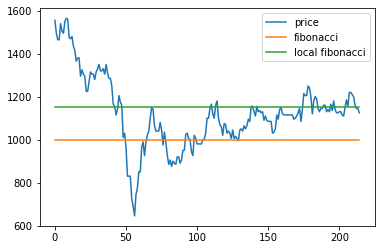

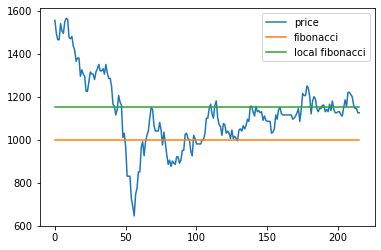

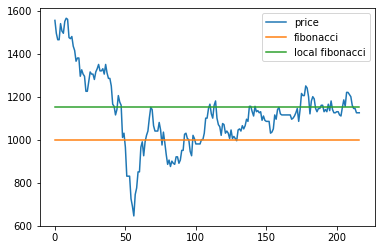

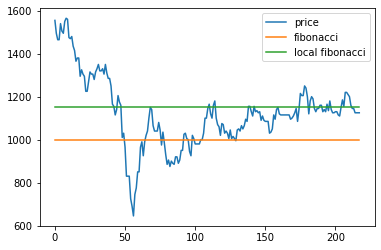

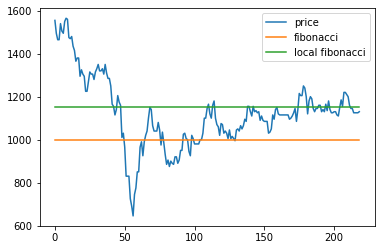

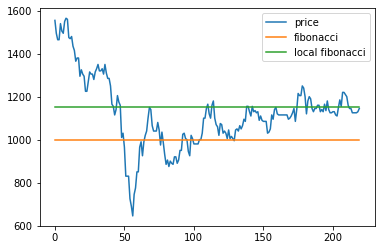

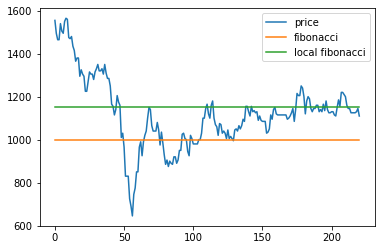

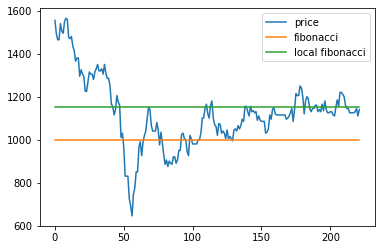

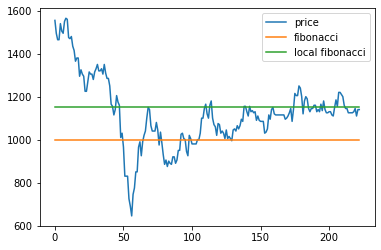

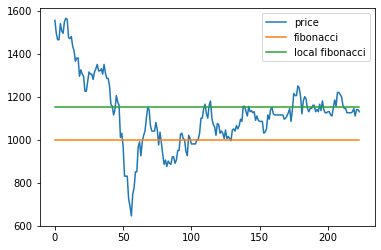

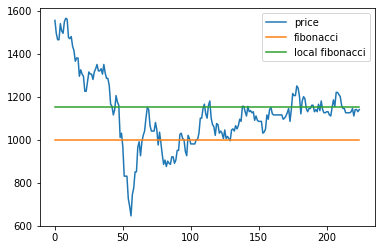

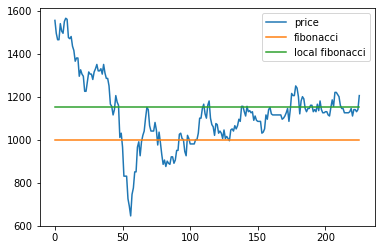

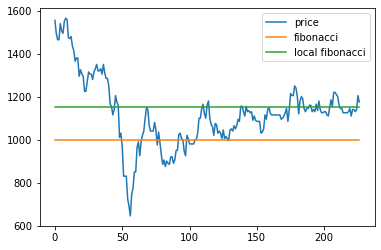

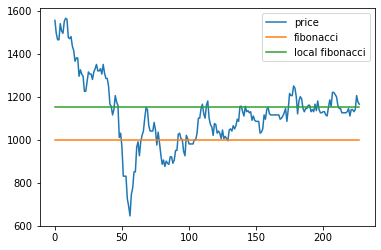

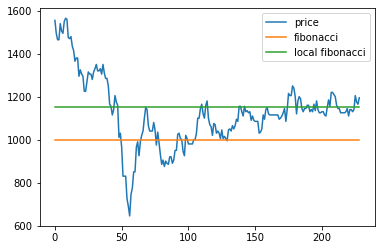

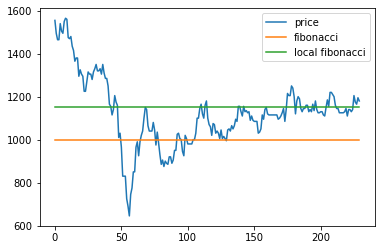

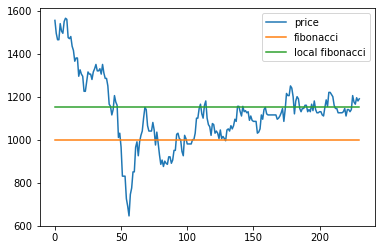

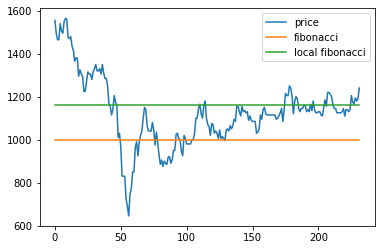

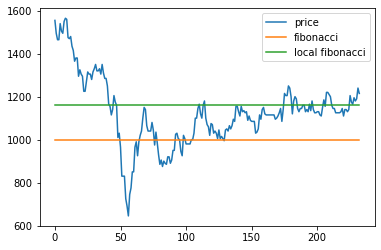

In [29]:
# hasil fuzzy

fuzzy = []

train = []
test = []

# loop

i = len(df_global)
while i < len(df_pakai) - 30:
    
    # update dulu
    df_global.append(df_pakai[i])
    train.append(df_pakai[i])
    test.append(df_pakai[i+30])
    del df_lokal[0]
    df_lokal.append(df_global[-1])
    
    # fibonacci
    max_global = max(df_global)
    min_global = min(df_global)
    fib_global = abs(df_global[-1]-0.618*(max_global-min_global))/(max_global-0.618*(max_global-min_global))*100
    
    max_lokal = max(df_lokal)
    min_lokal = min(df_lokal)
    fib_lokal = abs(df_lokal[-1]-0.618*(max_lokal-min_lokal))/(max_lokal-0.618*(max_lokal-min_lokal))*100
    
    # fuzzy logic
    # Create the fuzzy variables and membership functions
    fibonacci_retracement_global = ctrl.Antecedent(np.arange(0, 101, 1), 'fibonacci_retracement_global')
    fibonacci_retracement_lokal = ctrl.Antecedent(np.arange(0, 101, 1), 'fibonacci_retracement_lokal')
    decision = ctrl.Consequent(np.arange(0, 101, 1), 'decision')
    
    
    # Define the membership functions for the variables
    fibonacci_retracement_global['close'] = fuzz.trimf(fibonacci_retracement_global.universe, [0, 0, 80])
    fibonacci_retracement_global['medium'] = fuzz.trimf(fibonacci_retracement_global.universe, [0, 40, 80])
    fibonacci_retracement_global['far'] = fuzz.trimf(fibonacci_retracement_global.universe, [80, 100, 100])
    
    fibonacci_retracement_lokal['close'] = fuzz.trimf(fibonacci_retracement_lokal.universe, [0, 0, 50])
    fibonacci_retracement_lokal['medium'] = fuzz.trimf(fibonacci_retracement_lokal.universe, [30, 50, 70])
    fibonacci_retracement_lokal['far'] = fuzz.trimf(fibonacci_retracement_lokal.universe, [50, 100, 100])
    
    decision['sell'] = fuzz.trimf(decision.universe, [0, 0, 50])
    decision['neutral'] = fuzz.trimf(decision.universe, [0, 50, 100])
    decision['buy'] = fuzz.trimf(decision.universe, [50, 100, 100])
    
    # Define the fuzzy rules to be updated as times goes on
    rules = [
        ctrl.Rule(fibonacci_retracement_global['close'] & fibonacci_retracement_lokal['close'], decision['buy']),
        ctrl.Rule(fibonacci_retracement_global['close'] & fibonacci_retracement_lokal['medium'], decision['buy']),
        ctrl.Rule(fibonacci_retracement_global['close'] & fibonacci_retracement_lokal['far'], decision['neutral']),
        
        ctrl.Rule(fibonacci_retracement_global['medium'] & fibonacci_retracement_lokal['close'], decision['buy']),
        ctrl.Rule(fibonacci_retracement_global['medium'] & fibonacci_retracement_lokal['medium'], decision['neutral']),
        ctrl.Rule(fibonacci_retracement_global['medium'] & fibonacci_retracement_lokal['far'], decision['sell']),
        
        ctrl.Rule(fibonacci_retracement_global['far'] & fibonacci_retracement_lokal['close'], decision['neutral']),
        ctrl.Rule(fibonacci_retracement_global['far'] & fibonacci_retracement_lokal['medium'], decision['sell']),
        ctrl.Rule(fibonacci_retracement_global['far'] & fibonacci_retracement_lokal['far'], decision['sell'])
    ]
    
    # Create the fuzzy control system
    decision_ctrl = ctrl.ControlSystem(rules)
    decision_calc = ctrl.ControlSystemSimulation(decision_ctrl)
    
    # Pass inputs and compute the decision
    decision_calc.input['fibonacci_retracement_global'] = fib_global
    decision_calc.input['fibonacci_retracement_lokal'] = fib_lokal
    
    # plotting
    garis_global = []
    garis_lokal = []
    sbx = []
    j = 0
    while j < len(df_global):
        sbx.append(j)
        garis_global.append(max_global-0.618*(max_global-min_global))
        garis_lokal.append(max_lokal-0.618*(max_lokal-min_lokal))
        j += 1
        
    
    plt.plot(sbx, df_global)
    plt.plot(sbx, garis_global)
    plt.plot(sbx, garis_lokal)
    plt.legend(["price", "fibonacci", "local fibonacci"])
    plt.show()
    
    # Compute the decision and place it in list
    decision_calc.compute()
    fuzzy.append(decision_calc.output['decision'])
    
    # loop control
    i += 1

label:
 [2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
prediction:
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
akurasi:
 25.563909774436087


C:\Users\Rafi\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Rafi\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


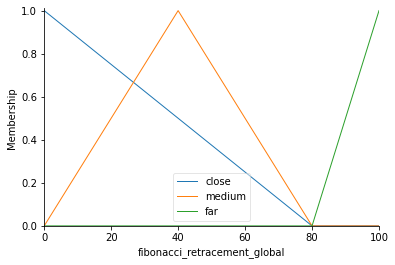

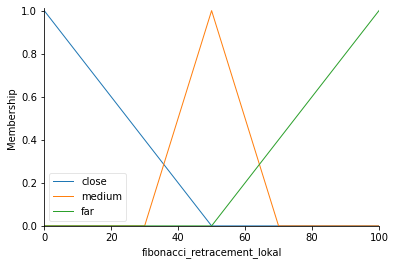

In [30]:
# Visualize the membership functions
fibonacci_retracement_global.view()
fibonacci_retracement_lokal.view()

# scoring
y_label = []
y_pred = []

i = 0
while i < len(fuzzy):
    # ini memasukkan prediksi
    if fuzzy[i] < 30:
        y_pred.append(0)
    elif 30 <= fuzzy[i] <= 70:
        y_pred.append(1)
    else:
        y_pred.append(2)
    
    # memasukkan label
    if train[i] > 1.005*test[i]:
        y_label.append(0) # menjual dengan keuntungan 0.5% dan ini bisa diganti ganti
    if train[i] < 0.995*test[i]:
        y_label.append(2) 
    else:
        y_label.append(1)
        
    i += 1
    
banyak_benar = 0
i = 0
while i < len(y_pred):
    if y_label[i] == y_pred[i]:
        banyak_benar += 1
    i += 1
print("label:\n", y_label)
print("prediction:\n", y_pred)
print("akurasi:\n", banyak_benar/len(y_pred)*100)